In [1]:
#Adding all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#Reading the data
df = pd.read_csv("glacier_land_ice102.csv")
df
#display rows and columns 

,Unnamed: 0,LST,Unnamed: 0.1,X_Coor,Y_Coor,band1,band2,band3,band4,band5,...,band9,band10,POINTID,nbr,ndbi,ndmi,ndsi,ndvi,ndwi,label
0,0,23.794017,0,629719.8862,3959150.278,1449,1556,1750,1784,1851,...,2704,2719,1,-1,-1,-1,-1,-1,-1,0
1,1,23.794017,1,629679.8862,3959140.278,1269,1445,1598,1585,1718,...,2592,2311,2,-1,-1,-1,-1,-1,-1,0
2,2,21.481792,2,629689.8862,3959140.278,1286,1447,1562,1670,1794,...,2672,2427,3,-1,-1,-1,-1,-1,-1,0
3,3,21.481792,3,629699.8862,3959140.278,1310,1445,1601,1734,1839,...,2719,2549,4,-1,-1,-1,-1,-1,-1,0
4,4,21.481792,4,629709.8862,3959140.278,1365,1507,1703,1779,1854,...,2733,2674,5,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,-14.955011,48571,622553.1266,3956865.173,1278,1278,1292,1210,1227,...,1114,955,48572,-1,-1,-1,-1,-1,-1,1
1048571,1048571,-11.789091,48572,622563.1266,3956865.173,1251,1206,1221,1187,1188,...,1095,940,48573,-1,-1,-1,-1,-1,-1,1
1048572,1048572,-11.789091,48573,622573.1266,3956865.173,1190,1174,1141,1175,1165,...,1095,948,48574,-1,-1,-1,-1,-1,-1,1
1048573,1048573,-11.789091,48574,622583.1266,3956865.173,1225,1173,1216,1172,1159,...,1113,978,48575,-1,-1,-1,-1,-1,-1,1


In [3]:
#checking the datatype of the columns
df.dtypes

Unnamed: 0        int64
LST             float64
Unnamed: 0.1      int64
X_Coor          float64
Y_Coor          float64
band1             int64
band2             int64
band3             int64
band4             int64
band5             int64
band6             int64
band7             int64
band8             int64
band9             int64
band10            int64
POINTID           int64
nbr               int64
ndbi              int64
ndmi              int64
ndsi              int64
ndvi              int64
ndwi              int64
label             int64
dtype: object

In [4]:
df.head()

,Unnamed: 0,LST,Unnamed: 0.1,X_Coor,Y_Coor,band1,band2,band3,band4,band5,...,band9,band10,POINTID,nbr,ndbi,ndmi,ndsi,ndvi,ndwi,label
0,0,23.794017,0,629719.8862,3959150.278,1449,1556,1750,1784,1851,...,2704,2719,1,-1,-1,-1,-1,-1,-1,0
1,1,23.794017,1,629679.8862,3959140.278,1269,1445,1598,1585,1718,...,2592,2311,2,-1,-1,-1,-1,-1,-1,0
2,2,21.481792,2,629689.8862,3959140.278,1286,1447,1562,1670,1794,...,2672,2427,3,-1,-1,-1,-1,-1,-1,0
3,3,21.481792,3,629699.8862,3959140.278,1310,1445,1601,1734,1839,...,2719,2549,4,-1,-1,-1,-1,-1,-1,0
4,4,21.481792,4,629709.8862,3959140.278,1365,1507,1703,1779,1854,...,2733,2674,5,-1,-1,-1,-1,-1,-1,0


In [5]:
# To find how many how many of each class there are
df["label"].value_counts()
# label - is debris covered glacier or not (0 = No and 1 = Yes)

0    999999
1     48576
Name: label, dtype: int64

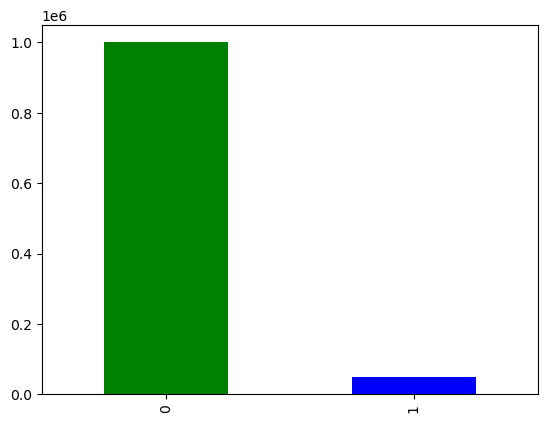

In [6]:
df["label"].value_counts().plot(kind="bar", color=["green","blue"] );

In [7]:
# checking if there are any missing values
df.isna().sum()

Unnamed: 0          0
LST             75625
Unnamed: 0.1        0
X_Coor              0
Y_Coor              0
band1               0
band2               0
band3               0
band4               0
band5               0
band6               0
band7               0
band8               0
band9               0
band10              0
POINTID             0
nbr                 0
ndbi                0
ndmi                0
ndsi                0
ndvi                0
ndwi                0
label               0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,LST,Unnamed: 0.1,X_Coor,Y_Coor,band1,band2,band3,band4,band5,...,band9,band10,POINTID,nbr,ndbi,ndmi,ndsi,ndvi,ndwi,label
count,1.048575e+06,972950.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1.048575e+06
mean,5.242870e+05,3.807357,4.779613e+05,6.133406e+05,3.953281e+06,1.750751e+03,1.889716e+03,2.065344e+03,2.151630e+03,2.297370e+03,...,2.791387e+03,2.512132e+03,4.779623e+05,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.632573e-02
std,3.026977e+05,10.426686,2.991318e+05,9.122150e+03,3.470056e+03,5.514295e+02,6.405259e+02,7.623711e+02,7.290003e+02,7.306174e+02,...,1.039805e+03,1.003376e+03,2.991318e+05,0.0,0.0,0.0,0.0,0.0,0.0,2.101897e-01
min,0.000000e+00,-18.825913,0.000000e+00,6.007499e+05,3.946240e+06,5.860000e+02,4.570000e+02,3.620000e+02,3.360000e+02,3.350000e+02,...,1.320000e+02,1.010000e+02,1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00
25%,2.621435e+05,-2.889889,2.135675e+05,6.057999e+05,3.950430e+06,1.326000e+03,1.382000e+03,1.462000e+03,1.558000e+03,1.734000e+03,...,2.094000e+03,1.791000e+03,2.135685e+05,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00
50%,5.242870e+05,1.685305,4.757110e+05,6.109699e+05,3.953400e+06,1.665000e+03,1.805000e+03,1.977000e+03,2.046000e+03,2.190000e+03,...,2.704000e+03,2.425000e+03,4.757120e+05,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00
75%,7.864305e+05,9.568608,7.378545e+05,6.203999e+05,3.956920e+06,2.098000e+03,2.349000e+03,2.639000e+03,2.718000e+03,2.861000e+03,...,3.640000e+03,3.312000e+03,7.378555e+05,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00
max,1.048574e+06,36.857147,9.999980e+05,6.345031e+05,3.959150e+06,6.894000e+03,7.052000e+03,7.460000e+03,6.505000e+03,6.326000e+03,...,6.325000e+03,6.026000e+03,9.999990e+05,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.000000e+00


In [9]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1','POINTID','nbr','ndbi','ndmi','ndsi','ndvi','ndwi'], axis = 1)

In [10]:
df.head()

,LST,X_Coor,Y_Coor,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,label
0,23.794017,629719.8862,3959150.278,1449,1556,1750,1784,1851,1934,1863,1918,2704,2719,0
1,23.794017,629679.8862,3959140.278,1269,1445,1598,1585,1718,1788,1856,1826,2592,2311,0
2,21.481792,629689.8862,3959140.278,1286,1447,1562,1670,1794,1882,1865,1875,2672,2427,0
3,21.481792,629699.8862,3959140.278,1310,1445,1601,1734,1839,1936,1892,1907,2719,2549,0
4,21.481792,629709.8862,3959140.278,1365,1507,1703,1779,1854,1951,1932,1925,2733,2674,0


In [11]:
# filling the missing values with the mean of column values
columns=df.columns
for i in range(len(columns)):
    if df[columns[i]].isnull().sum():
        print(f"{columns[i]}=>{df[columns[i]].isnull().sum()}")
        mean=df[columns[i]].mean()
        df[columns[i]].replace(np.nan,mean,inplace=True)

LST=>75625


In [12]:
# again checking if there are any missing values after filling missing values
df.isna().sum()

LST       0
X_Coor    0
Y_Coor    0
band1     0
band2     0
band3     0
band4     0
band5     0
band6     0
band7     0
band8     0
band9     0
band10    0
label     0
dtype: int64

In [13]:
pd.crosstab(df.label, df.LST)

LST,-18.825913,-18.825706,-18.725320,-18.524128,-18.423769,-18.323266,-18.122506,-18.122318,-18.122263,-18.121260,...,36.088010,36.091011,36.234854,36.281538,36.295477,36.336332,36.386296,36.441145,36.502207,36.857147
label,,,,,,,,,,,,,,,,,,,,,
0,9,9,15,9,9,15,9,9,10,9,...,4,6,6,5,3,2,4,4,6,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# making a correlation matrix
df.corr()

,LST,X_Coor,Y_Coor,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,label
LST,1.000000,0.191780,0.379089,0.093838,0.084647,0.085909,0.082847,0.059579,0.053483,0.051855,0.053213,0.062910,0.063974,0.003597
X_Coor,0.191780,1.000000,0.726945,-0.204329,-0.255606,-0.280747,-0.307397,-0.332864,-0.344188,-0.330783,-0.350967,-0.360619,-0.367321,0.339467
Y_Coor,0.379089,0.726945,1.000000,0.080584,0.045499,0.026565,0.013892,-0.022981,-0.038447,-0.035339,-0.043528,-0.083591,-0.083901,0.246509
band1,0.093838,-0.204329,0.080584,1.000000,0.985820,0.965835,0.932034,0.875979,0.848029,0.849837,0.816150,0.547302,0.588601,-0.084189
band2,0.084647,-0.255606,0.045499,0.985820,1.000000,0.992153,0.967881,0.925756,0.903478,0.905397,0.875685,0.637056,0.672913,-0.106136
band3,0.085909,-0.280747,0.026565,0.965835,0.992153,1.000000,0.978766,0.940200,0.921035,0.921260,0.896022,0.690315,0.724326,-0.111327
band4,0.082847,-0.307397,0.013892,0.932034,0.967881,0.978766,1.000000,0.978410,0.964319,0.939337,0.944565,0.743650,0.769352,-0.140994
band5,0.059579,-0.332864,-0.022981,0.875979,0.925756,0.940200,0.978410,1.000000,0.996887,0.977697,0.987690,0.795062,0.804027,-0.183761
band6,0.053483,-0.344188,-0.038447,0.848029,0.903478,0.921035,0.964319,0.996887,1.000000,0.982208,0.995257,0.822914,0.827034,-0.196833
band7,0.051855,-0.330783,-0.035339,0.849837,0.905397,0.921260,0.939337,0.977697,0.982208,1.000000,0.981982,0.817858,0.818227,-0.202750


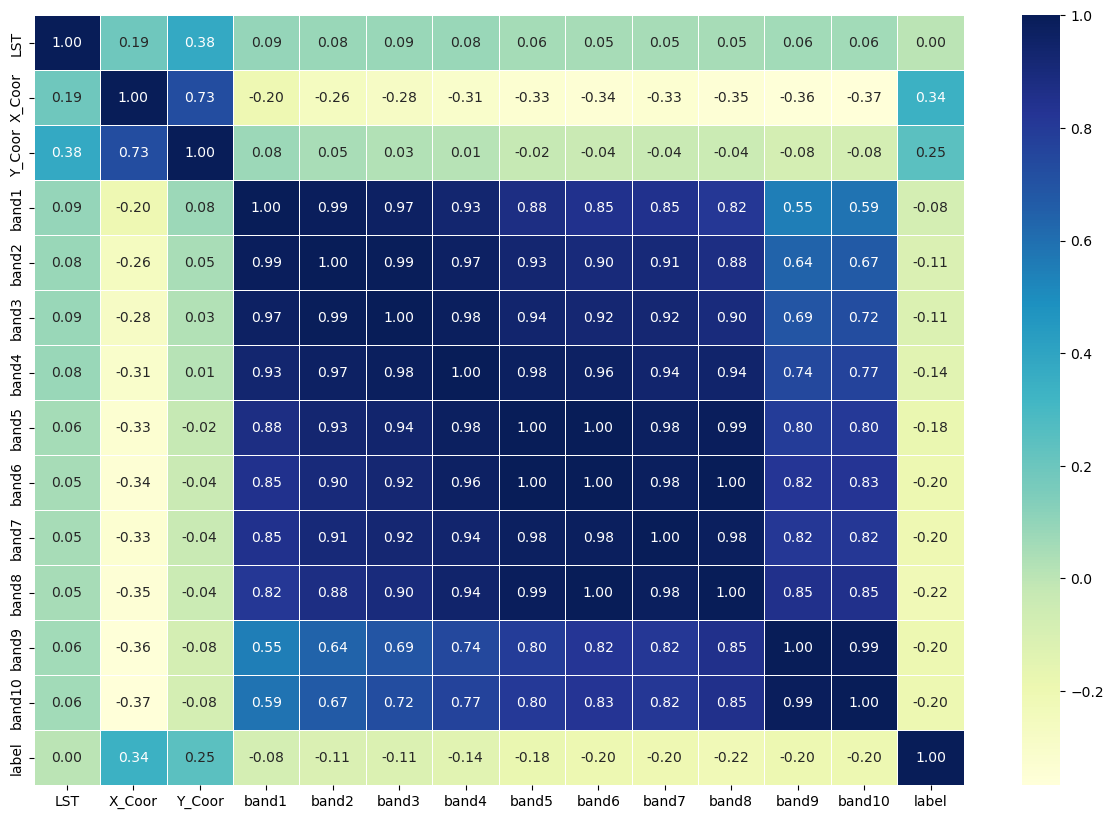

In [15]:
#making a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [16]:
df.head()

,LST,X_Coor,Y_Coor,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,label
0,23.794017,629719.8862,3959150.278,1449,1556,1750,1784,1851,1934,1863,1918,2704,2719,0
1,23.794017,629679.8862,3959140.278,1269,1445,1598,1585,1718,1788,1856,1826,2592,2311,0
2,21.481792,629689.8862,3959140.278,1286,1447,1562,1670,1794,1882,1865,1875,2672,2427,0
3,21.481792,629699.8862,3959140.278,1310,1445,1601,1734,1839,1936,1892,1907,2719,2549,0
4,21.481792,629709.8862,3959140.278,1365,1507,1703,1779,1854,1951,1932,1925,2733,2674,0


In [17]:
# Creating X ( features matrix)
X = df.drop(['label'], axis = 1) 
X

,LST,X_Coor,Y_Coor,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10
0,23.794017,629719.8862,3959150.278,1449,1556,1750,1784,1851,1934,1863,1918,2704,2719
1,23.794017,629679.8862,3959140.278,1269,1445,1598,1585,1718,1788,1856,1826,2592,2311
2,21.481792,629689.8862,3959140.278,1286,1447,1562,1670,1794,1882,1865,1875,2672,2427
3,21.481792,629699.8862,3959140.278,1310,1445,1601,1734,1839,1936,1892,1907,2719,2549
4,21.481792,629709.8862,3959140.278,1365,1507,1703,1779,1854,1951,1932,1925,2733,2674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,-14.955011,622553.1266,3956865.173,1278,1278,1292,1210,1227,1226,1162,1172,1114,955
1048571,-11.789091,622563.1266,3956865.173,1251,1206,1221,1187,1188,1186,1121,1157,1095,940
1048572,-11.789091,622573.1266,3956865.173,1190,1174,1141,1175,1165,1166,1037,1139,1095,948
1048573,-11.789091,622583.1266,3956865.173,1225,1173,1216,1172,1159,1165,1088,1118,1113,978


In [18]:
# Creating y ( labels )
y = df["label"] 
y 

0          0
1          0
2          0
3          0
4          0
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: label, Length: 1048575, dtype: int64

In [19]:
# To find how many of each class there are
df["label"].value_counts()

# label - is debris covered glacier or not (0 = No and 1 = Yes)

0    999999
1     48576
Name: label, dtype: int64

In [20]:
np.random.seed(26)

# Splitting Data into Training 80% and Testing 20% Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train, len(X_train)

(              LST       X_Coor       Y_Coor  band1  band2  band3  band4  \
 292392  -9.780245  607199.8862  3955350.278   2408   2582   2725   2764   
 567770  -8.776316  613899.8862  3952460.278   1990   1942   2243   1936   
 516775  -2.187429  606729.8862  3952990.278   2505   2741   2935   2912   
 547753  -8.473919  609699.8862  3952670.278   1476   1512   1592   1582   
 336439  -9.881538  616759.8862  3954630.278   1811   1951   2231   2498   
 ...           ...          ...          ...    ...    ...    ...    ...   
 993217  -3.143967  603649.8862  3946520.278   1527   1703   1848   1909   
 1025456  6.511560  626083.1266  3957065.173   1556   1572   1694   1618   
 448262  -4.654892  613599.8862  3953640.278   1857   1905   2039   2223   
 947518   1.886292  605029.8862  3947530.278   1251   1311   1463   1622   
 316213  -6.512050  628929.8862  3954940.278   1277   1234   1163   1422   
 
          band5  band6  band7  band8  band9  band10  
 292392    2765   2894   2812   

In [22]:
X_test , len(X_test)

(               LST       X_Coor       Y_Coor  band1  band2  band3  band4  \
 741911    4.097108  610919.8862  3950380.278   1078   1124   1133   1390   
 358218   -2.587334  607849.8862  3954390.278   1966   1997   2265   2304   
 786535    1.535126  609089.8862  3949770.278   1438   1570   1742   1768   
 313981   -8.724337  606859.8862  3954970.278   1965   2255   2534   2624   
 595242    3.807357  613519.8862  3952160.278   3123   3421   3933   3569   
 ...            ...          ...          ...    ...    ...    ...    ...   
 430085   -4.951752  612699.8862  3953790.278   2066   2346   2636   2603   
 239511    9.121060  611089.8862  3956600.278   2536   2775   2963   2957   
 970249   19.965756  604989.8862  3947100.278   1137   1217   1201   1376   
 1004783   7.510167  627963.1266  3957565.173   1597   1711   1865   1739   
 815114   -1.987880  601039.8862  3949410.278   2039   2366   2735   2829   
 
          band5  band6  band7  band8  band9  band10  
 741911    2012   21

In [23]:
y_train , len(y_train)

(292392     0
 567770     0
 516775     0
 547753     0
 336439     0
           ..
 993217     0
 1025456    1
 448262     0
 947518     0
 316213     0
 Name: label, Length: 838860, dtype: int64,
 838860)

In [24]:
y_test , len(y_test)

(741911     0
 358218     0
 786535     0
 313981     0
 595242     0
           ..
 430085     0
 239511     0
 970249     0
 1004783    1
 815114     0
 Name: label, Length: 209715, dtype: int64,
 209715)

In [25]:
# Keeping classification models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=7000),
          "KNN": KNeighborsClassifier(n_neighbors=20),
          "Random Forest": RandomForestClassifier(),
          "Gaussian Naive Bayes": GaussianNB(),
          "Decision Tree Classifier": DecisionTreeClassifier()
         }

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fitting and evaluating different classification models for supervised learning
    models : dictionary of different scikit-learn machine learning classification models
    X_train : training data with no labels
    X_test : testing data with no labels
    y_train : training labels
    y_test : testing labels
    
   """ 
    # setting up random.seed() method to help reproduce our results
    np.random.seed(26)
    
    #creating a dictionary to save the models score/accuracy
    model_scores = {}
    
    #loop through models
    for name, model in models.items():
        # fitting the model to the data
        model.fit(X_train,y_train)
        # evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores   

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'Logistic Regression': 0.967470138044489,
 'KNN': 0.999971389743223,
 'Random Forest': 0.9999761581193525,
 'Gaussian Naive Bayes': 0.9386453043416064,
 'Decision Tree Classifier': 0.9999761581193525}

In [27]:
np.random.seed(26)

# Classification using Decision Tree Classifier
clf =  DecisionTreeClassifier()
val_scores = cross_val_score(clf, X, y, cv=5)
val_scores

array([0.66992347, 0.98134611, 0.99943733, 0.99978542, 0.97138021])

In [28]:
# setting up random.seed() method to help reproduce our results
np.random.seed(26)

# Classification using Logistic Regression Classifier
clf =  LogisticRegression(max_iter=7000)
val_scores = cross_val_score(clf, X, y, cv=5)
val_scores

array([0.8491858 , 0.96906278, 0.96686932, 0.96534821, 0.96553895])

In [29]:
# setting up random.seed() method to help reproduce our results
np.random.seed(26)

# Classification using KNeighbours Classifier
clf =  KNeighborsClassifier()
val_scores = cross_val_score(clf, X, y, cv=5)
val_scores

C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.65436902, 0.98537539, 0.99991894, 1.        , 0.99607563])

In [30]:
# setting up random.seed() method to help reproduce our results
np.random.seed(26)

# Classification using Gaussian Naive's Bayes
clf =  GaussianNB()
val_scores = cross_val_score(clf, X, y, cv=5)
val_scores

array([0.88387097, 0.97232434, 0.99274253, 0.99573707, 0.99365806])

In [31]:
# setting up random.seed() method to help reproduce our results
np.random.seed(26)

# Classification using Random Forest Classifier
clf =  RandomForestClassifier()
val_scores = cross_val_score(clf, X, y, cv=5)
val_scores

array([0.58310564, 0.86047731, 0.99953747, 0.99963284, 0.95812412])

In [32]:
# smote on training dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 799916, 1: 38944})
Counter({0: 799916, 1: 799916})


In [33]:
len(X_train)

1599832

In [34]:
len(y_train)

1599832

In [35]:
len(X_test)

209715

In [36]:
len(y_test)

209715

<AxesSubplot:>

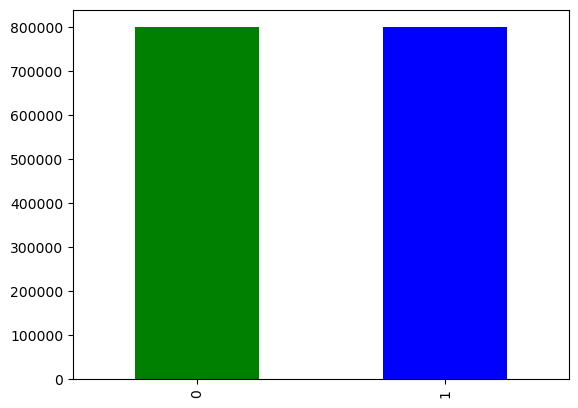

In [37]:
y_train.value_counts().plot(kind="bar", color=["green","blue"])

In [38]:
# Keeping classification models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=7000),
          "KNN": KNeighborsClassifier(n_neighbors=20),
          "Random Forest": RandomForestClassifier(),
          "Gaussian Naive Bayes": GaussianNB(),
          "Decision Tree Classifier": DecisionTreeClassifier()
         }

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fitting and evaluating different classification models for supervised learning
    models : dictionary of different scikit-learn machine learning classification models
    X_train : training data with no labels
    X_test : testing data with no labels
    y_train : training labels
    y_test : testing labels
    
   """ 
    # setting up random.seed() method to help reproduce our results
    np.random.seed(26)
    
    #creating a dictionary to save the models score/accuracy
    model_scores = {}
    
    #loop through models
    for name, model in models.items():
        # fitting the model to the data
        model.fit(X_train,y_train)
        # evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores   

In [39]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'Logistic Regression': 0.921855851989605,
 'KNN': 0.999952316238705,
 'Random Forest': 0.9999856948716115,
 'Gaussian Naive Bayes': 0.9254941229764204,
 'Decision Tree Classifier': 0.9999666213670935}

In [40]:
# Resolving Oversampling on whole imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({0: 999999, 1: 48576})
Counter({0: 999999, 1: 999999})


In [41]:
X, len(X)

(               LST         X_Coor        Y_Coor  band1  band2  band3  band4  \
 0        23.794017  629719.886200  3.959150e+06   1449   1556   1750   1784   
 1        23.794017  629679.886200  3.959140e+06   1269   1445   1598   1585   
 2        21.481792  629689.886200  3.959140e+06   1286   1447   1562   1670   
 3        21.481792  629699.886200  3.959140e+06   1310   1445   1601   1734   
 4        21.481792  629709.886200  3.959140e+06   1365   1507   1703   1779   
 ...            ...            ...           ...    ...    ...    ...    ...   
 1999993  17.820586  622703.660472  3.957025e+06   1586   1651   1683   1548   
 1999994   1.096804  618963.126600  3.956888e+06   1826   1932   2088   1994   
 1999995   3.286648  634382.513135  3.956985e+06   1974   1868   1986   1962   
 1999996  -2.374113  628531.997075  3.957635e+06   1352   1364   1432   1420   
 1999997   3.099260  628773.451567  3.957425e+06   1577   1595   1703   1697   
 
          band5  band6  band7  band8  

In [42]:
y, len(y)

(0          0
 1          0
 2          0
 3          0
 4          0
           ..
 1999993    1
 1999994    1
 1999995    1
 1999996    1
 1999997    1
 Name: label, Length: 1999998, dtype: int64,
 1999998)

<AxesSubplot:>

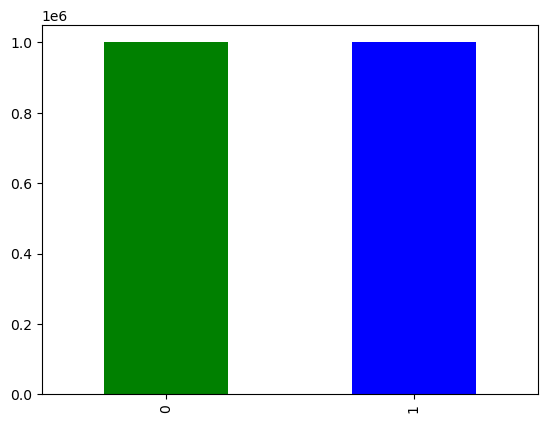

In [43]:
y.value_counts().plot(kind="bar", color=["green","blue"])

In [44]:
# Setting up random.seed() method to help reproduce our results
np.random.seed(26)

# Classification using Decision Tree Classifier
clf =  DecisionTreeClassifier()

# Calculating Accuracy
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_accuracy

array([0.8480925, 0.9972575, 0.99994  , 1.       , 0.999985 ])

In [45]:
dt_cv_acc = np.mean(cv_accuracy)
dt_cv_acc

0.9690549999925

In [46]:
# Calculating Precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="precision")
cv_precision

array([0.76731953, 0.99458935, 0.99987501, 1.        , 1.        ])

In [47]:
cv_pre = np.mean(cv_precision)
cv_pre

0.9523567801484287

In [48]:
# Calculating Recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="recall")
cv_recall

array([0.99999 , 0.999985, 0.99999 , 1.      , 0.99997 ])

In [49]:
cv_rec = np.mean(cv_recall)
cv_rec

0.999987

In [50]:
# Calculating F1-Score
cv_f1_score = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="f1")
cv_f1_score

array([0.8747977 , 0.99728485, 0.9999425 , 0.9999975 , 0.999985  ])

In [51]:
cv_f1 = np.mean(cv_f1_score)
cv_f1

0.9744015109522437

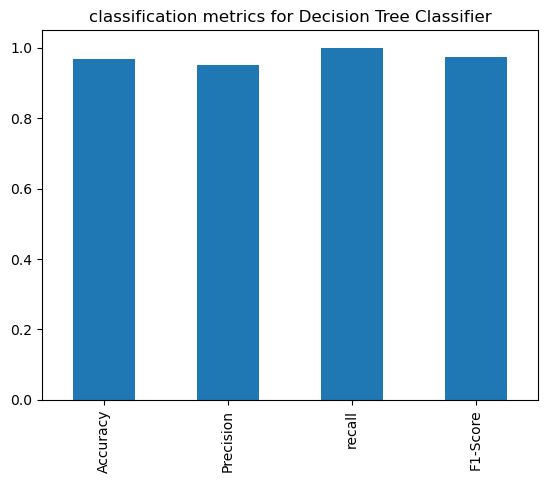

In [52]:
# Visualizing cross-validated metrics 
cv_metrics = pd.DataFrame({"Accuracy" : dt_cv_acc,
                           "Precision" : cv_pre,
                           "recall" : cv_rec,
                           "F1-Score" : cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title = "classification metrics for Decision Tree Classifier",
                      legend = False);

In [53]:
np.random.seed(26)

# Classification using Logistic Regression Classifier
clf =  LogisticRegression(max_iter=7000)

# Calculating Accuracy
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_accuracy

array([0.8467475 , 0.95653   , 0.9357225 , 0.98448996, 0.98683747])

In [54]:
lr_cv_acc = np.mean(cv_accuracy)
lr_cv_acc

0.9420654856637143

In [55]:
# Calculating Precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="precision")
cv_precision

array([0.76722939, 0.92797949, 0.9015154 , 0.99224779, 0.99962028])

In [56]:
cv_pre = np.mean(cv_precision)
cv_pre

0.9177184685759221

In [57]:
# Calculating Recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="recall")
cv_recall

array([0.99553   , 0.989885  , 0.97832   , 0.97660988, 0.974045  ])

In [58]:
cv_rec = np.mean(cv_recall)
cv_rec

0.9828779766098832

In [59]:
# Calculating F1-Score
cv_f1_score = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="f1")
cv_f1_score

array([0.86659572, 0.95793314, 0.93834869, 0.98436673, 0.98666694])

In [60]:
cv_f1 = np.mean(cv_f1_score)
cv_f1


0.9467822444363101

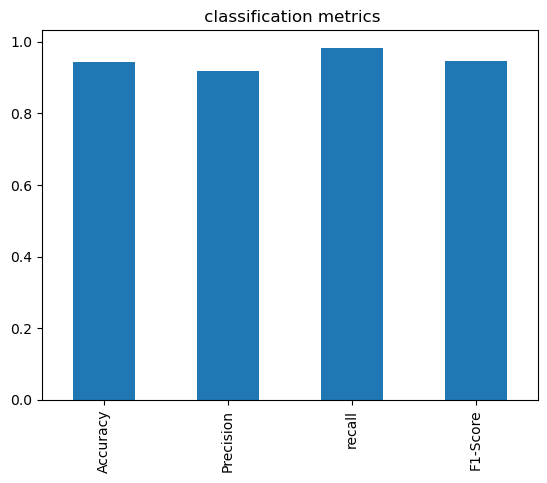

In [61]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : lr_cv_acc,
                           "Precision" : cv_pre,
                           "recall" : cv_rec,
                           "F1-Score" : cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title = " classification metrics",
                      legend = False);

In [62]:
# setting up random.seed() method to help reproduce our results
np.random.seed(26)

# Classification using KNeighbours Classifier
clf =  KNeighborsClassifier(n_neighbors=20)

# Calculating Accuracy
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_accuracy

C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.803335, 0.98918 , 1.      , 1.      , 1.      ])

In [63]:
knn_cv_acc = np.mean(cv_accuracy)
knn_cv_acc

0.958503

In [64]:
# Calculating Precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="precision")
cv_precision

C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.71770507, 0.97881837, 1.        , 1.        , 1.        ])

In [65]:
cv_pre = np.mean(cv_precision)
cv_pre

0.9393046873486479

In [66]:
# Calculating Recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="recall")
cv_recall

C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\parth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\parth\AppData\Local\Temp\ipykernel_14436\3586156727.py", line 2, in <module>
    cv_recall = cross_val_score(clf,
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 509, in cross_val_score
    cv_results = cross_validate(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 267, in cross_validate
    results = parallel(
  File "C:\Users\parth\anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\parth\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\parth\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job 

TypeError: object of type 'NoneType' has no len()

In [ ]:
cv_rec = np.mean(cv_recall)
cv_rec

In [ ]:
# Calculating F1-Score
cv_f1_score = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="f1")
cv_f1_score

In [ ]:
cv_f1 = np.mean(cv_f1_score)
cv_f1

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : knn_cv_acc,
                           "Precision" : cv_pre,
                           "recall" : cv_rec,
                           "F1-Score" : cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title = " classification metrics",
                      legend = False);

In [ ]:
# setting up random.seed() method to help reproduce our results
np.random.seed(26)

# Classification using Gaussian Naive's Bayes
clf =  GaussianNB()

# Calculating Accuracy
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_accuracy

In [ ]:
nb_cv_acc = np.mean(cv_accuracy)
nb_cv_acc

In [ ]:
# Calculating Precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="precision")
cv_precision

In [ ]:
cv_pre = np.mean(cv_precision)
cv_pre

In [ ]:
# Calculating Recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="recall")
cv_recall

In [ ]:
cv_rec = np.mean(cv_recall)
cv_rec

In [ ]:
# Calculating F1-Score
cv_f1_score = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="f1")
cv_f1_score

In [ ]:
cv_f1 = np.mean(cv_f1_score)
cv_f1

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : nb_cv_acc,
                           "Precision" : cv_pre,
                           "recall" : cv_rec,
                           "F1-Score" : cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title = " classification metrics",
                      legend = False);

In [67]:
# setting up random.seed() method to help reproduce our results
np.random.seed(26)

# Classification using Random Forest Classifier
clf =  RandomForestClassifier()

# Calculating Accuracy
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_accuracy

array([0.79743, 0.99595, 1.     , 1.     , 1.     ])

In [68]:
rf_cv_acc = np.mean(cv_accuracy)
rf_cv_acc

0.958676

In [ ]:
# Calculating Precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="precision")
cv_precision

In [ ]:
cv_pre = np.mean(cv_precision)
cv_pre

In [ ]:
# Calculating Recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="recall")
cv_recall

In [ ]:
cv_rec = np.mean(cv_recall)
cv_rec

In [ ]:
# Calculating F1-Score
cv_f1_score = cross_val_score(clf,
                              X,
                              y,
                              cv=5, 
                              scoring="f1")
cv_f1_score

In [ ]:
cv_f1 = np.mean(cv_f1_score)
cv_f1

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : rf_cv_acc,
                           "Precision" : cv_pre,
                           "recall" : cv_rec,
                           "F1-Score" : cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title = " classification metrics",
                      legend = False);

In [ ]:
compare_metrics = pd.DataFrame({"Decision Tree Classifier" : dt_cv_acc,
                           "Logistic Regression" : lr_cv_acc,
                           "K-Nearest Neighbours Classifier" : knn_cv_acc,
                           "Gaussian Naive Bayes" : nb_cv_acc,
                           "Random Forest Classifier": rf_cv_acc
                            },
                        index=[0])
compare_metrics.T.plot.bar(title = " comparision of models accuracy",
                      legend = False);